

# Project: Investigate a Dataset - [No Show Appointments Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This Dataset contains the records of the patients with various types of diseases who booked appointments and did not showed up on their appointment Day. 


### Questions for Analysis, they are all to know the factors that made them miss thier Appointments
> what factors are affecting the no show appointment


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01   23% |███████▌                        | 2.5MB 22.5MB/s eta 0:00:01    35% |███████████▎                    | 3.7MB 21.8MB/s eta 0:00:01    54% |█████████████████▋              | 5.7MB 23.0MB/s eta 0:00:01    66% |█████████████████████▏          | 6.9MB 26.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.1MB/s eta 0:00:01   32% |██████████▍                     | 4.3MB 23.3MB/s eta 0:00:01    40% |████████████▉                   | 5.4MB 21.0MB/s eta 0:00:01    48% |███████████████▌                | 6.5MB 24.1MB/s eta 0:00:01    56% |██████████████████▏             | 7.6MB 22.7MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 21.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
>Gender: Gender

>age: Age

>age_group: Age Group

>people_showed_up: Patients who attended or missed their appointment (0 = Missed; 1 = Attended)

>scholarship: Medical Scholarship


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Read in the Dataset, creat dataframe
noshowapp = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Print the first few records to review data and format
noshowapp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#printing the shape of this data set
noshowapp.shape

(110527, 14)

In [7]:
#checking for duplicates of this data set
noshowapp.duplicated().sum()

0

In [8]:
#number of the unique values of this data set
noshowapp['PatientId'].nunique()

62299

In [9]:
#number of the duplicated patient id of this data set
noshowapp['PatientId'].duplicated().sum()

48228

In [10]:
#checking if there were patients ids dulpicated but differ in the no show status of this data set
noshowapp.duplicated(['PatientId','No-show']).sum()

38710

In [11]:
#checking for missing values of this data set
noshowapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
#printing information to know more about this data set so i can work on it
noshowapp.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37 but the max is 115 and the min is probably worng because its -1 so i guess this was mistake but i think it wont bother us whulie doing my analysis majority of them as well are not handcapped and doesnt have chronic diseases or even alcohol addictive


In [13]:
mask =noshowapp.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

 

In [14]:
#removing the -1 row value , although it will not make much affect on my analysis 
noshowapp.drop(index=99832,inplace=True)

In [15]:
noshowapp.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#correcting column name of this data set because it was miss typed in a wrong spelling
noshowapp.rename(columns={'Hipertension':'Hypertention'},inplace=True)
noshowapp.rename(columns={'No-show':'No_show'},inplace=True)
noshowapp.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertention,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#i am going to remove duplicated Ids with duplicated showing status, leaving the duplicated ids if they differ in the showing status only
noshowapp.drop_duplicates(['PatientId','No_show'],inplace=True)
noshowapp.shape

(71816, 14)

In [18]:
#removing unnecessary data so i can focus more on the important columns
noshowapp.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
noshowapp.head()
   

,Gender,Age,Neighbourhood,Scholarship,Hypertention,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## Data Wrangling Summary

after i gatherd the data i showed the dimensions of my data then i checked for duplicated appointment
then removed the dplicated patient IDs and then checked for any missing data to fixand finally i cleaned it by correcting column names and dropping the unnecessary ones


<a id='eda'></a>
## Exploratory Data Analysis

after cleaning my data i am ready to explore using computing statistics and creating visualization to answer the questons


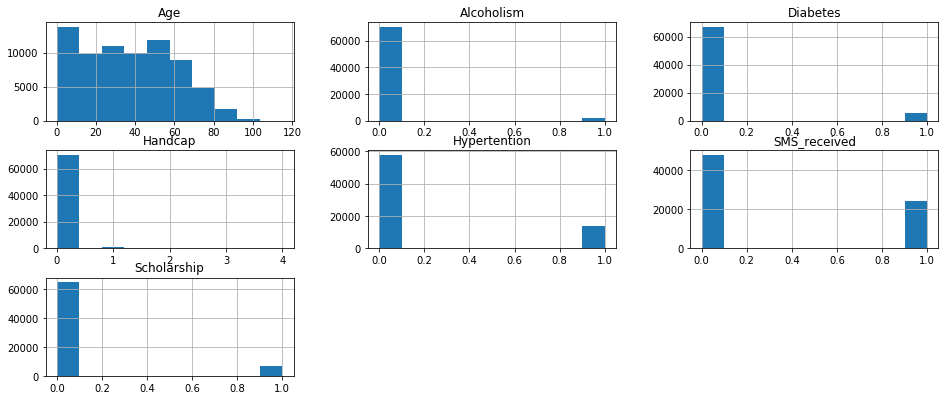

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
noshowapp.hist(figsize=(16,6.5));


In [20]:
show=noshowapp.No_show=='No'
noshow=noshowapp.No_show=='Yes'
noshowapp[show].count(),noshowapp[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertention     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertention     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [21]:
noshowapp[show].mean(),noshowapp[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertention     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertention     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for show is 37 while the no show is 34, also patients recieved sms less than no show patient which means we must contact the sms department to revise our system


<a id='wrangling'></a>
## Investigation for the influencing factors on the attendance rate

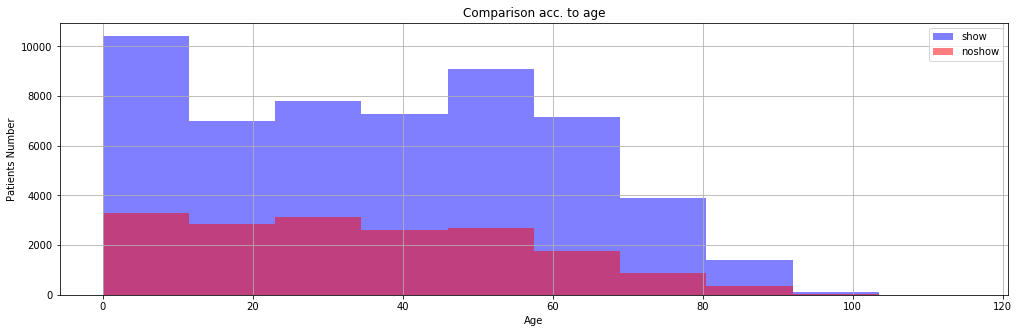

In [22]:
#does age affect the attendence of this data set by any mean
def attendance(noshowapp,col_name,attended, absent):
    plt.figure(figsize=[17,5])
    noshowapp[col_name][show].hist(alpha=0.5,bins=10,color='blue',label='show')
    noshowapp[col_name][noshow].hist(alpha=0.5,bins=10,color='red',label='noshow')
    plt.legend()
    plt.title('Comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients Number')
attendance(noshowapp,'Age',show,noshow)

ages from 0 to 8 are the most showing which are parents taking care of their children then from 44 to 55 and the least attending are whom above 65 year 

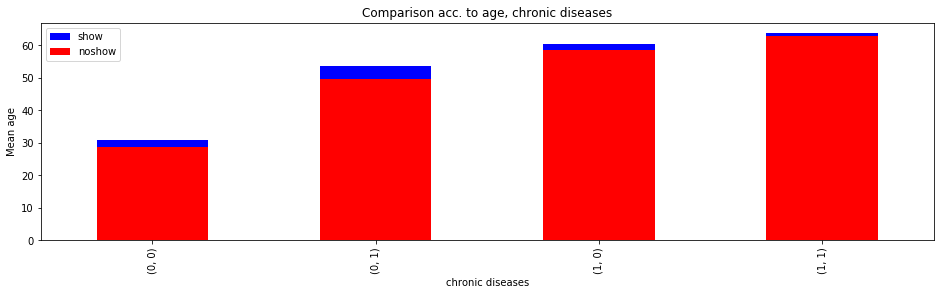

In [23]:
#does age and chronic diseases affects the attendance together of this data set by any mean
plt.figure(figsize=[16,4])
noshowapp[show].groupby(['Hypertention','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
noshowapp[noshow].groupby(['Hypertention','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')

plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [24]:
noshowapp[show].groupby(['Hypertention','Diabetes']).mean()['Age'],noshowapp[noshow].groupby(['Hypertention','Diabetes']).mean()['Age']

(Hypertention  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertention  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing patients is 30 and non showing is 28 mean age of hypertension diabetic showing patience is around 64 and non showing is about 63 whech mean that there is a correlation between age and chronic diseases
but there is no correlation between chronic disease and attending the doctor appointment

does the gender of the patient affect the attendance???

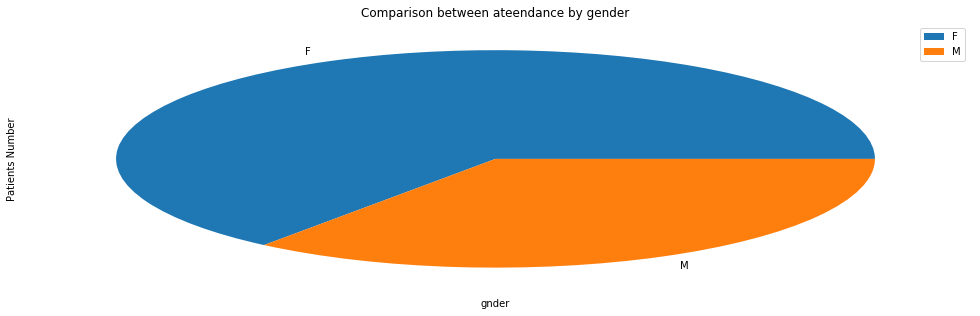

In [25]:
def attendance(noshowapp,col_name,attended, absent):
    plt.figure(figsize=[17,5])
    noshowapp[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend()
    plt.title('Comparison between ateendance by gender')
    plt.xlabel('gnder')
    plt.ylabel('Patients Number')
attendance(noshowapp,'Gender',show,noshow)


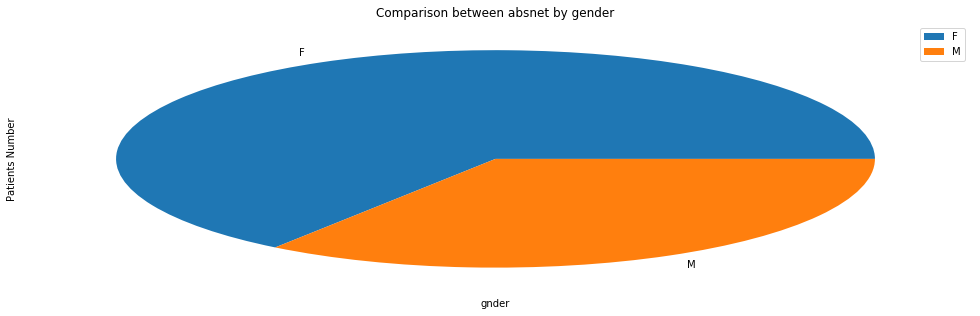

In [26]:
def attendance(noshowapp,col_name,attended, absent):
    plt.figure(figsize=[17,5])
    noshowapp[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend()
    plt.title('Comparison between absnet by gender')
    plt.xlabel('gnder')
    plt.ylabel('Patients Number')
attendance(noshowapp,'Gender',show,noshow)

Gender has no effect on attendence

Text(0,0.5,'Mean age')

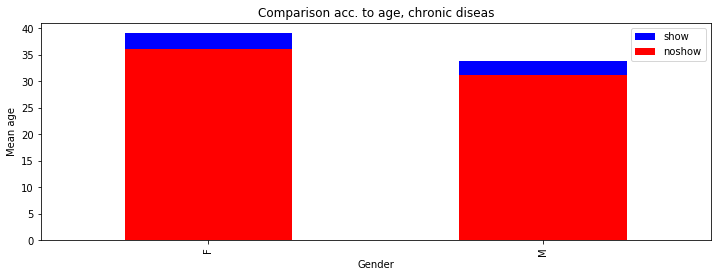

In [28]:
#does age and chronic gender affect the attendance together of this data set by any mean
plt.figure(figsize=[12,4])
noshowapp[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
noshowapp[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison acc. to age, chronic diseas')
plt.xlabel('Gender')
plt.ylabel('Mean age')

In [29]:
print(noshowapp[show].groupby('Gender').Age.mean(),noshowapp[noshow].groupby('Gender').Age.mean(),noshowapp[show].groupby('Gender').Age.median(),noshowapp[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


there is no correlation between age and gender affecting the show rate as showed above
as we can observe the mean and the median of both sexes ages are kind of the same

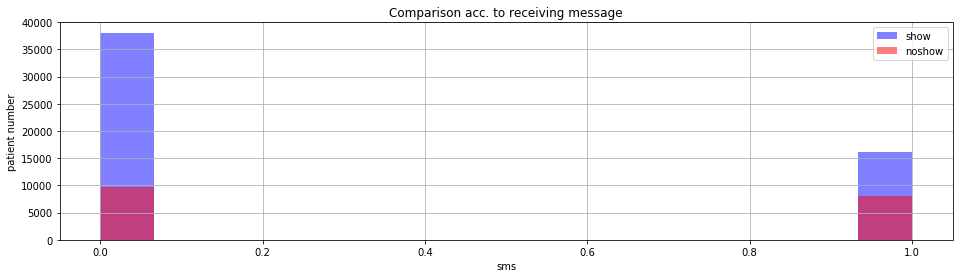

In [31]:
#does receiveing sms affect the attendance of this data set by any mean
def attendance (noshowapp,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    noshowapp[col_name][show].hist(alpha=0.5,bins=15,color='blue',label='show')
    noshowapp[col_name][noshow].hist(alpha=0.5,bins=15,color='red',label='noshow')
    plt.legend();
    plt.title('Comparison acc. to receiving message')
    plt.xlabel('sms')
    plt.ylabel('patient number');
attendance(noshowapp,'SMS_received',show,noshow)

number of showing patients without receiving sms is greater than patients with receiving sms, which mean we need to talk with our SMS campaghin

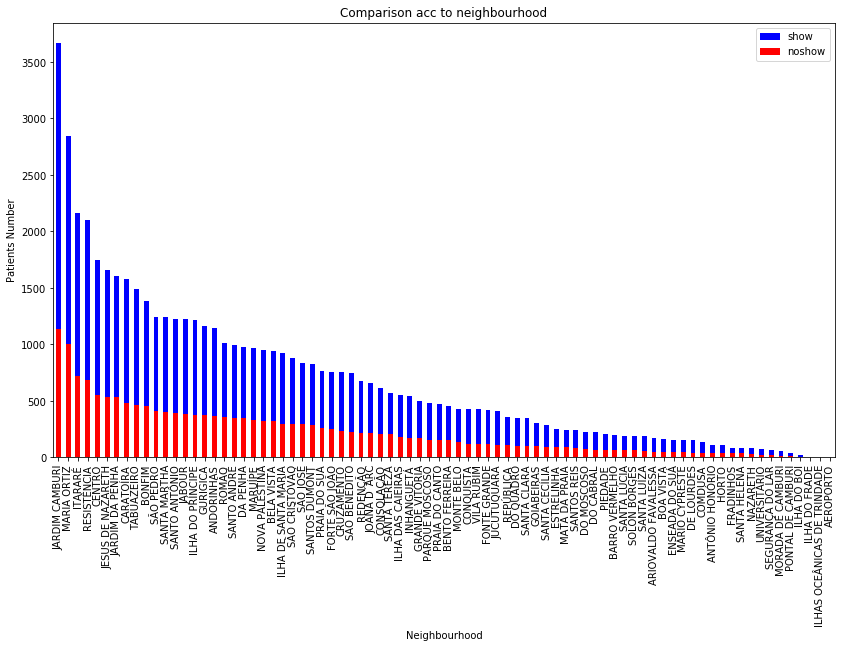

In [33]:
#does neighbourhood affect the attendance of this data set by any mean
plt.figure(figsize=[14,8])
noshowapp.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
noshowapp.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

as it is really obvious neighbourhood has a big effect on attendance and absent 

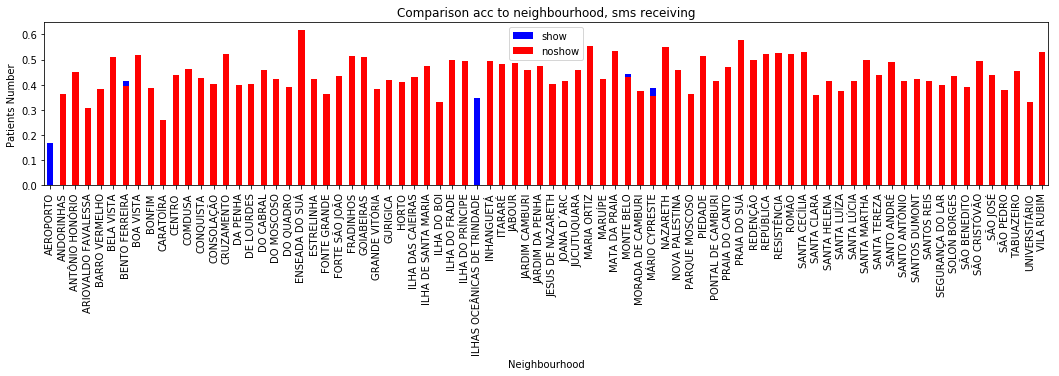

In [34]:
plt.figure(figsize=[18,3])
noshowapp[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue', label='show')
noshowapp[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red', label='noshow')
plt.legend()
plt.title('Comparison acc to neighbourhood, sms receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

sms has response only in 5 neighbourhood as we can see and also this graph let me ask does the sms have one campaghin for all areas or different campaghin because on of them all sms was recieved and attended others is not

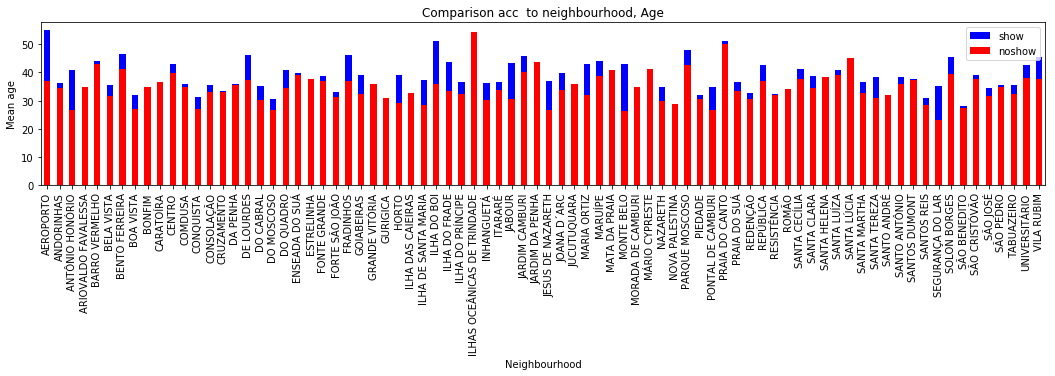

In [35]:
plt.figure(figsize=[18,3])
noshowapp[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
noshowapp[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison acc  to neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean age');

patients attendace from specific neighbourhood differ from acc to ages from place to place some with low and other with high age attendance

<a id='conclusions'></a>
## Conclusions

> neighbourhood has a great effect on attendance or not 

> number of showing patients from specific neighbourhood affected by receiving sms and ages

> age has a clear infulunce on the showing rate ages from 0 to 8 are the most showing then from 45:55 and the least attending are whom above 65 years old

> number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms campaghin

## Limitaions
> no clear  correlation between showing and gender ,chronic diseases



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])